# Part 1: Heterogeneous treatment effects using causal trees and forests
For this part, we will be using experimental data for computing heterogeneous effects through causal trees and forests. For all exercises, the predictors $X$ are all variables that are not the outcome $Y$ or the treatment $D$.

### 1.1. Load the data (1 points). 
### This is data for and experiment regarding the National Supported Work Demonstration (NSW) job-training program. You can find the data here, and read a description of the data here. For further details of the experiment and the program, you can use this link

In [73]:
df <- read.csv("/Users/gabriel/Documents/GitHub/CausalAI-Course/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv")
head(df)

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,37,11,1,0,1,1,0,0,9930.0459
2,1,22,9,0,1,0,1,0,0,3595.8940
3,1,30,12,1,0,0,0,0,0,24909.4492
4,1,27,11,1,0,0,1,0,0,7506.1460
5,1,33,8,1,0,0,1,0,0,289.7899
6,1,22,9,1,0,0,1,0,0,4056.4939


### 1.2. Find the ATE (1.5 points). 
### With `re78` as the outcome variable of interest, find the Average Treatment Effect of participation in the program. Specifically, you should find it by calculating the difference between the means of the treatment group and the control group (the Simple Difference of Means or SDM). What can you say about the program?

In [74]:
# Hallamos el ATE
model <- lm(re78 ~ treat, data = df)

summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4554.801,408.0459,11.162474,1.154114e-25
treat,1794.342,632.8534,2.835321,4.787530e-03


##### We can say that when an individual is supported by the work program he can obtain, on average, a real income of 1,794 thousand dollars for the year 1975, considering only the aggregate effect of the program.

### 1.3. Heterogeneous effects with causal trees (3 points). 
### Use causal trees like we saw in class. For Python, you should use the `econml` package; for R, use the `grf` package; and for Julia, you will need to create the auxiliary variable $Y$∗ and fit a decision tree regressor. Report the splits the tree finds and interpret them.

In [75]:
X <- setdiff(names(df), c("treat", "re78"))
X

[1] "age"      "educ"     "black"    "hisp"     "marr"     "nodegree" "re74"    
[8] "re75"

In [77]:
# Fit the logistic regression model to predict propensity scores
#logistic_model <- glm(treat ~ ., data = df[,c(X,'treat')], family = binomial)
#df$pscore <- predict(logistic_model, df[X], type = "response")
#head(df)

#library(ggplot2)
#ggplot(df, aes(x = pscore, fill = as.factor(treat))) +
  #geom_histogram(binwidth = 0.05, position = "identity", alpha = 0.7) +
  #labs(
  #  title = "Predicted Propensity Scores",
   # x = "Propensity Score",
    #fill = "Treat"
  #) 
  #xlim(0, 1)

In [78]:
# df$y_star <- df$re78 / (df$treat * df$pscore - (1 - df$treat) * (1 - df$pscore))
# mean(df$y_star, na.rm = TRUE)
# head(df)

In [79]:
# Correr una vez esta parte
X <- df[,X] 
Y <- df[,"re78"]
D <- df[,"treat"]

In [80]:
library(grf)
tree <- causal_forest(X, Y, D, num.trees = 1,
                      mtry = ncol(X))

get_tree(tree, 1)

GRF tree object 
Number of training samples: 222 
Variable splits: 
(1) split_variable: educ  split_value: 11 
  (2) split_variable: re74  split_value: 0 
    (4) split_variable: age  split_value: 29 
      (8) split_variable: age  split_value: 25 
        (12) * num_samples: 45  avg_Y: 4700.42 avg_W: 0.31 
        (13) * num_samples: 9  avg_Y: 4443.71 avg_W: 0.67 
      (9) * num_samples: 16  avg_Y: 3873.08 avg_W: 0.31 
    (5) split_variable: age  split_value: 19 
      (10) * num_samples: 5  avg_Y: 6389.66 avg_W: 0.4 
      (11) * num_samples: 16  avg_Y: 5505.66 avg_W: 0.31 
  (3) split_variable: age  split_value: 28 
    (6) * num_samples: 15  avg_Y: 6738.83 avg_W: 0.73 
    (7) * num_samples: 5  avg_Y: 2652.09 avg_W: 0.6 

#### The tree is divided into 6 divisions based on years of education, earnings in 1974 and age. We see that the NSW work program is designed primarily for people with many years of education and over the age of 25, and that it also depends mainly on the results obtained in 1974. If there are no earnings in that year the following occurs: the probability of young individuals being treated is relatively lower than older individuals, but they still have a high treatment effect.

#### After 11 years of education, age remains relevant, showing that highly educated individuals under 28 have a higher CATE than those over 28 with the same level of education, but still the probability of being treated is high as it depends mainly on years of education.

#### In summary, the work program seeks to help mainly highly educated individuals around the age of 28. In the case of those with less than 11 years of education, the program seeks out adult individuals over 25 years of age. It has also been shown that even though young individuals with little education are poorly treated, they have high CATE effects. This may be due to the fact that when they are young they have a greater opportunity to improve and to take care of themselves.

### 1.4. Heterogeneous effects with causal forests (3 points). 
### Use causal forests like we saw in class. For Python, you should use the `econml` package; for R, use the `grf` package; and for Julia, you will need to use the auxiliary variable $Y$ ∗ computed in the previous exercise and fit a random forest regressor. Report the importance of the prediction variables.

In [99]:
cf <- causal_forest(X, Y, D)
tree <- get_tree(cf, 1)
tree

GRF tree object 
Number of training samples: 222 
Variable splits: 
(1) split_variable: age  split_value: 27 
  (2) split_variable: age  split_value: 21 
    (4) split_variable: educ  split_value: 9 
      (8) * num_samples: 12  avg_Y: 3790.33 avg_W: 0.33 
      (9) * num_samples: 23  avg_Y: 4885.86 avg_W: 0.3 
    (5) split_variable: re74  split_value: 0 
      (10) * num_samples: 38  avg_Y: 5016.15 avg_W: 0.45 
      (11) * num_samples: 11  avg_Y: 8401.51 avg_W: 0.55 
  (3) split_variable: educ  split_value: 10 
    (6) * num_samples: 12  avg_Y: 4722.07 avg_W: 0.5 
    (7) * num_samples: 15  avg_Y: 7095.87 avg_W: 0.4 

In [100]:
varimp <- variable_importance(cf)
ranked.vars <- order(varimp, decreasing = TRUE)
importances <- data.frame(variable = colnames(X)[ranked.vars], importance = varimp[ranked.vars])
importances

variable,importance
<chr>,<dbl>
age,0.325931919
re74,0.202075376
re75,0.171999999
educ,0.166698123
marr,0.055658389
nodegree,0.053428128
black,0.022635709
hisp,0.001572356


### 1.5. Plot heterogeneous effects (1.5 points). 
### Plot how the predicted treatment effect changes depending on a variable of your choice. (You can see the last example in PD11 for clarification of what you should do in this exercise)

In [101]:
df$predicted_effects <- predict(cf, X)$predictions

# Aislamos efectos predichos por variable
df$age_bins <- floor(df$age / 5) * 5 # modificamos variable 
df$age_bins[df$age_bins == 15] <- 17 # reemplazamos por el valor minimo de la variable
predicted_effects_age <- aggregate(predicted_effects ~ age, data = df, mean)

df$re74_bins <- floor(df$re74 / 500) * 500 # modificamos variable re75 en intervalos de 500 porque es continua 
predicted_effects_re74 <- aggregate(predicted_effects ~ re74_bins, data = df, mean)

predicted_effects_educ <- aggregate(predicted_effects ~ educ, data = df, mean)

df$re75_bins <- floor(df$re75 / 500) * 500 # modificamos variable re75 en intervalos de 500 porque es continua 
predicted_effects_re75 <- aggregate(predicted_effects ~ re75_bins, data = df, mean)

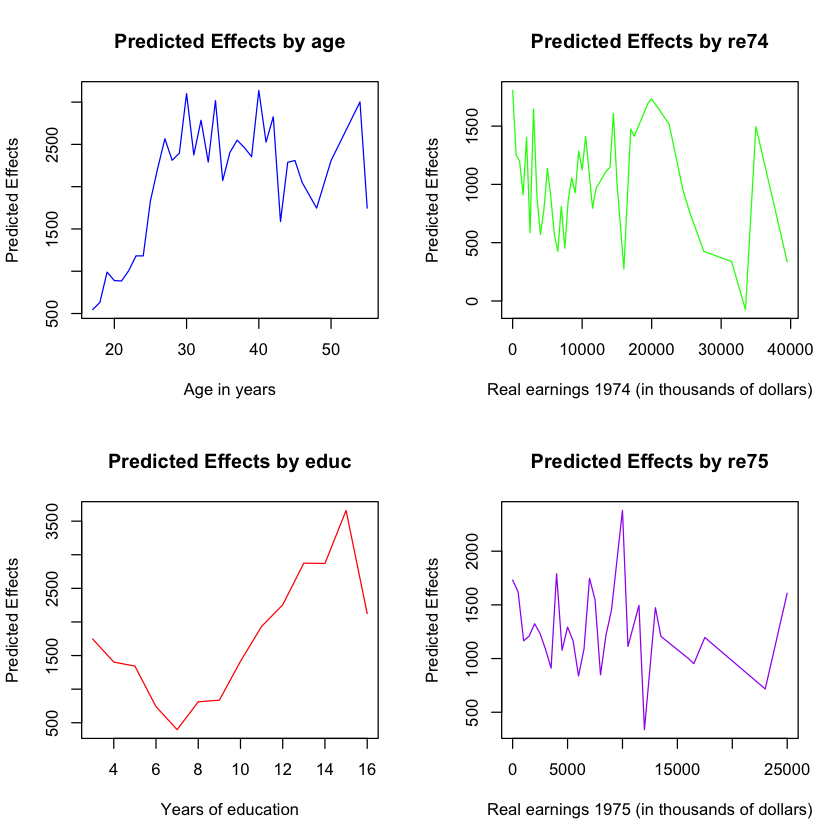

In [104]:
par(mfrow = c(2, 2))

# Predicted effects by age
plot(predicted_effects_age$age, predicted_effects_age$predicted_effects, type = "l", col = "blue",
     xlab = "Age in years", ylab = "Predicted Effects", main = "Predicted Effects by age")

# Predicted effects by re74
plot(predicted_effects_re74$re74, predicted_effects_re74$predicted_effects, type = "l", col = "green",
     xlab = "Real earnings 1974 (in thousands of dollars)", ylab = "Predicted Effects", main = "Predicted Effects by re74")

# Predicted effects by educ
plot(predicted_effects_educ$educ, predicted_effects_educ$predicted_effects, type = "l", col = "red",
     xlab = "Years of education", ylab = "Predicted Effects", main = "Predicted Effects by educ")

# Predicted effects by re75
plot(predicted_effects_re75$re75, predicted_effects_re75$predicted_effects, type = "l", col = "purple",
     xlab = "Real earnings 1975 (in thousands of dollars)", ylab = "Predicted Effects", main = "Predicted Effects by re75")


# Part 2: Double/Debiased machine learning in observational data
#### In this part, we will be using observational data for computing the average treatment effect of the same program as in Part 1. This data is constructed by taking the treatment group from the same dataset as in Part 1, but constructing the control group from a different dataset; that is, the entirety of the control is comprised of observations from the Current Population Survey. Therefor, we may not have comparable treatment and control groups. To tackle this issue, we can use Double/Debiased machine learning.

In [18]:
library(xtable)
library(randomForest)
library(hdm)
library(glmnet)
library(sandwich)

set.seed(1)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


Loading required package: Matrix

Loaded glmnet 4.1-8



### 2.1. Load the data (1 points). 
### You can find the data here, and read a description of the data here. For further details on how this data was created, you can use this link.

In [19]:
df2 <- read.csv("/Users/gabriel/Documents/GitHub/CausalAI-Course/Labs/Assignment/Assignment_5/data/observational/biased_control.csv")
head(df2)

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0,45,11,0,0,1,1,21.516670,25.243551,25.564670,2025,91125,121,0,0,236.68337,462.967085,637.23686
2,0,21,14,0,0,0,0,3.175971,5.852565,13.496080,441,9261,196,0,0,44.46359,10.086791,34.25252
3,0,38,12,0,0,1,0,23.039020,25.130760,25.564670,1444,54872,144,0,0,276.46823,530.796421,631.55509
4,0,48,6,0,0,1,1,24.994369,25.243551,25.564670,2304,110592,36,0,0,149.96621,624.718489,637.23686
5,0,18,8,0,0,1,1,1.669295,10.727610,9.860869,324,5832,64,0,0,13.35436,2.786546,115.08162
6,0,22,11,0,0,1,1,16.365760,18.449270,25.564670,484,10648,121,0,0,180.02336,267.838093,340.37555


### 2.2. Group comparisons (1.5 points). 
### For the treatment and control group separately, report summary statistics of three variables of your choice. Can you spot any big differences between the treatment and control groups?

In [20]:
library(dplyr)

# Calcular estadísticas descriptivas para agesq, eduqsq y u75 según treat
descriptive_stats <- df2 %>%
  group_by(treat) %>%
  summarise(
    mean_agesq = mean(agesq, na.rm = TRUE),
    sd_agesq = sd(agesq, na.rm = TRUE),
    mean_educsq = mean(educsq, na.rm = TRUE),
    sd_educsq = sd(educsq, na.rm = TRUE),
    mean_u75 = mean(u75, na.rm = TRUE),
    sd_u75 = sd(u75, na.rm = TRUE),
    n = n()
  )

print(descriptive_stats)

# A tibble: 2 x 8
  treat mean_agesq sd_agesq mean_educsq sd_educsq mean_u75 sd_u75     n
  <int>      <dbl>    <dbl>       <dbl>     <dbl>    <dbl>  <dbl> <int>
1     0      1226.     785.        153.      67.2    0.109  0.312 15992
2     1       717.     431.        111.      39.3    0.6    0.491   185


#### There are a large number of observations in the control group compared to the treatment group. We find that the age and years of education of the control group are on average much higher than those of the treatment group, which contains younger and less educated individuals. We also see that the probability of individuals in the treatment group being unemployed in 1975 is much higher than that of the control individuals.

### 2.3. Compute the SMD (1.5 points). 
### Find the simple difference of means, which we can use as a naive estimate of the ATE. How does the result in this case compare to the result in point 1.2.?

In [21]:
# Columnas numéricas a normalizar
numeric_columns <- c('age', 'educ', 're74', 're75', 're78', 'agesq', 'agecube', 'educsq', 'interaction1', 're74sq', 're75sq')

x_numeric <- df2[, numeric_columns]
x_numeric <- scale(x_numeric)
df2[, numeric_columns] <- as.data.frame(x_numeric)

head(df2)

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0,1.0745693,-0.351562668,0,0,1,1,0.7943524,1.2596453,1.1183117,1.0273777,0.9356892,-0.4685902,0,0,0.51881523,0.68278935,1.4889161
2,0,-1.1000317,0.694460741,0,0,0,0,-1.1135307,-0.8224502,-0.1296042,-0.9944220,-0.8821942,0.6498058,0,0,-0.96452424,-1.05545310,-0.9512266
3,0,0.4403106,-0.002888198,0,0,1,0,0.9527141,1.2475344,1.1183117,0.2857959,0.1306500,-0.1256154,0,0,0.82583079,0.94313151,1.4659233
4,0,1.3463944,-2.094935016,0,0,1,1,1.1561185,1.2596453,1.1183117,1.3834901,1.3679762,-1.7361056,0,0,-0.15037178,1.30362264,1.4889161
5,0,-1.3718568,-1.397586076,0,0,1,1,-1.2702620,-0.2989951,-0.5054922,-1.1437594,-0.9583391,-1.3185711,0,0,-1.20459087,-1.08347286,-0.6241293
6,0,-1.0094233,-0.351562668,0,0,1,1,0.2585312,0.5301134,1.1183117,-0.9395373,-0.8513943,-0.4685902,0,0,0.08157597,-0.06615359,0.2875848


In [23]:
# Media de re78 para el grupo tratado
mean_treated <- mean(df2[df2$treat == 1, "re78"], na.rm = TRUE)

# Media de re78 para el grupo de control
mean_control <- mean(df2[df2$treat == 0, "re78"], na.rm = TRUE)

# Efecto promedio del tratamiento (ATE)
ate <- mean_treated - mean_control

# Impresión de resultados
cat(sprintf("Mean re78 for the treated group: %.2f\n", mean_treated))
cat(sprintf("Mean re78 for the control group: %.2f\n", mean_control))
cat(sprintf("Average Treatment Effect (ATE): %.2f\n", ate))

Mean re78 for the treated group: -0.87
Mean re78 for the control group: 0.01
Average Treatment Effect (ATE): -0.88


##### The results are vastly different because this dataset comes from an observational sample that comes from other different datasets, which makes it impossible to compare both groups of data. We will estimate a double/biased machine learning to find the unobservable effects of the treatment group on the control group to perform causal inference of the work program.

### 2.4. Using DML (6 points). 
### Use the DML procedure as we saw in the Lab, in order to find a better estimate of the ATE. You may use the `doubleML` packages for Python and R, but this package does not exist for Julia, so you will have to build your own procedure like we saw in class. You will be rewarded extra points for using more than one method for predictions. At the end, report the treatment effect you found, as well as the MSE for $D$ and $Y$ achieved by the method(s) you used.

In [24]:
DML2.for.PLM <- function(x, d, y, dreg, yreg, nfold=2) {
  nobs <- nrow(x) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    dfit <- dreg(x[-I[[b]],], d[-I[[b]]]) #take a fold out
    yfit <- yreg(x[-I[[b]],], y[-I[[b]]]) # take a foldt out
    dhat <- predict(dfit, x[I[[b]],], type="response") #predict the left-out fold
    yhat <- predict(yfit, x[I[[b]],], type="response") #predict the left-out fold
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
        }
  rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  coef.est <- coef(rfit)[2]  #extract coefficient
  se <- sqrt(vcovHC(rfit)[2,2]) #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals
}

In [25]:
#DML with OLS
cat(sprintf("\nDML with OLS w/o feature selection \n"))
dreg <- function(x,d){ glmnet(x, d, lambda = 0) } #ML method= OLS using glmnet; using lm gives bugs
yreg <- function(x,y){ glmnet(x, y, lambda = 0) } #ML method = OLS
DML2.OLS = DML2.for.PLM(x, d, y, dreg, yreg, nfold=10)


#DML with Lasso:
cat(sprintf("\nDML with Lasso \n"))
dreg <- function(x,d){ rlasso(x,d, post=FALSE) } #ML method= lasso from hdm
yreg <- function(x,y){ rlasso(x,y, post=FALSE) } #ML method = lasso from hdm
DML2.lasso = DML2.for.PLM(x, d, y, dreg, yreg, nfold=10)


# DML with Random Forest
cat(sprintf("\nDML with Random Forest \n"))
dreg <- function(x, d) { randomForest(x, d) } #ML method=Forest
yreg <- function(x, y) { randomForest(x, y) } #ML method=Forest
DML2.RF = suppressWarnings(DML2.for.PLM(x, d, y, dreg, yreg, nfold=10))


DML with OLS w/o feature selection 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.155821 (0.0650114)

DML with Lasso 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.111327 (0.0653628)

DML with Random Forest 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.0901041 (0.0691623)


In [40]:
# install.packages("gbm")
# install.packages("e1071")
# install.packages("nnet")
# install.packages("class")
# install.packages("FNN")


  There is a binary version available but the source version is later:
     binary  source needs_compilation
FNN 1.1.3.2 1.1.4.1              TRUE



installing the source package 'FNN'




In [32]:
# DML with Elastic Net
cat(sprintf("\nDML with Elastic Net \n"))
dreg <- function(x, d) { glmnet(x, d, alpha = 0.1, lambda = 0.1) }
yreg <- function(x, y) { glmnet(x, y, alpha = 0.1, lambda = 0.1) }
DML2.EN = suppressWarnings(DML2.for.PLM(x, d, y, dreg, yreg, nfold=10))

# DML with Support Vector Machine
library(e1071)
cat(sprintf("\nDML with Support Vector Machine (SVM) \n"))
dreg <- function(x, d) { svm(x, d, type = "eps-regression", kernel = "radial") }
yreg <- function(x, y) { svm(x, y, type = "eps-regression", kernel = "radial") }
DML2.SVM = suppressWarnings(DML2.for.PLM(x, d, y, dreg, yreg, nfold=10))

# DML with with Gradient Boosting Machines
library(gbm)
cat(sprintf("\nDML with Gradient Boosting Machines (GBM) \n"))
x <- as.data.frame(x)
dreg <- function(x, d) {gbm(d ~ ., data = cbind(d, x), distribution = "bernoulli", n.trees = 100) }  # Usando 100 árboles
yreg <- function(x, y) {gbm(y ~ ., data = cbind(y, x), distribution = "gaussian", n.trees = 100) }
DML2.GBM = suppressWarnings(DML2.for.PLM(x, d, y, dreg, yreg, nfold = 10))

x <- as.matrix(df2[, !(names(df2) %in% c("re78", "treat"))])


DML with Elastic Net 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.0608905 (0.0646023)

DML with Support Vector Machine (SVM) 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.243217 (0.0769364)

DML with Gradient Boosting Machines (GBM) 
fold: 

Using 100 trees...


Using 100 trees...




1  

Using 100 trees...


Using 100 trees...




2  

Using 100 trees...


Using 100 trees...




3  

Using 100 trees...


Using 100 trees...




4  

Using 100 trees...


Using 100 trees...




5  

Using 100 trees...


Using 100 trees...




6  

Using 100 trees...


Using 100 trees...




7  

Using 100 trees...


Using 100 trees...




8  

Using 100 trees...


Using 100 trees...




9  

Using 100 trees...


Using 100 trees...




10  
coef (se) = 0.0806376 (0.0715272)


In [39]:
#DML MIX: D with RF and Y with OLS
cat(sprintf("\nDML with Random Forest for D and OLS for Y \n"))
dreg <- function(x, d) { randomForest(x, d) } #ML method=Forest
yreg <- function(x,y){ glmnet(x, y, lambda = 0) } 
DML2.mix = suppressWarnings(DML2.for.PLM(x, d, y, dreg, yreg, nfold=10))


DML with Random Forest for D and OLS for Y 


fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.0853145 (0.0670835)


In [40]:
# Calcular RMSE para cada modelo en D y Y
prRes.D <- c(
  mean((DML2.OLS$dtil)^2),
  mean((DML2.lasso$dtil)^2),
  mean((DML2.RF$dtil)^2),
  mean((DML2.EN$dtil)^2),
  mean((DML2.SVM$dtil)^2),
  mean((DML2.GBM$dtil)^2),
  mean((DML2.mix$dtil)^2)
)

prRes.Y <- c(
  mean((DML2.OLS$ytil)^2),
  mean((DML2.lasso$ytil)^2),
  mean((DML2.RF$ytil)^2),
  mean((DML2.EN$ytil)^2),
  mean((DML2.SVM$ytil)^2),
  mean((DML2.GBM$ytil)^2),
  mean((DML2.mix$ytil)^2)
)

prRes <- rbind(sqrt(prRes.D), sqrt(prRes.Y))
rownames(prRes) <- c("RMSE D", "RMSE Y")
colnames(prRes) <- c("OLS", "Lasso", "RF", "EN", "SVM", "GBM", "Mix")

In [41]:
# Crear la tabla de resultados
table <- matrix(0, 7, 4)

# Point Estimate
table[1, 1] <- as.numeric(DML2.OLS$coef.est)
table[2, 1] <- as.numeric(DML2.lasso$coef.est)
table[3, 1] <- as.numeric(DML2.RF$coef.est)
table[4, 1] <- as.numeric(DML2.EN$coef.est)
table[5, 1] <- as.numeric(DML2.SVM$coef.est)
table[6, 1] <- as.numeric(DML2.GBM$coef.est)
table[7, 1] <- as.numeric(DML2.mix$coef.est)

# SE
table[1, 2] <- as.numeric(DML2.OLS$se)
table[2, 2] <- as.numeric(DML2.lasso$se)
table[3, 2] <- as.numeric(DML2.RF$se)
table[4, 2] <- as.numeric(DML2.EN$se)
table[5, 2] <- as.numeric(DML2.SVM$se)
table[6, 2] <- as.numeric(DML2.GBM$se)
table[7, 2] <- as.numeric(DML2.mix$se)

# RMSE Y
table[1, 3] <- as.numeric(prRes[2, 1])
table[2, 3] <- as.numeric(prRes[2, 2])
table[3, 3] <- as.numeric(prRes[2, 3])
table[4, 3] <- as.numeric(prRes[2, 4])
table[5, 3] <- as.numeric(prRes[2, 5])
table[6, 3] <- as.numeric(prRes[2, 6])
table[7, 3] <- as.numeric(prRes[2, 7])

# RMSE D
table[1, 4] <- as.numeric(prRes[1, 1])
table[2, 4] <- as.numeric(prRes[1, 2])
table[3, 4] <- as.numeric(prRes[1, 3])
table[4, 4] <- as.numeric(prRes[1, 4])
table[5, 4] <- as.numeric(prRes[1, 5])
table[6, 4] <- as.numeric(prRes[1, 6])
table[7, 4] <- as.numeric(prRes[1, 7])

# Imprimir los resultados
colnames(table) <- c("Estimate", "Standard Error", "RMSE Y", "RMSE D")
rownames(table) <- c("OLS", "Lasso", "RF", "EN", "SVM", "GBM", "Mix")
table

,Estimate,Standard Error,RMSE Y,RMSE D
OLS,0.15582094,0.06501138,0.7226647,0.09868213
Lasso,0.11132707,0.06536284,0.7236831,0.09964065
RF,0.09010407,0.06916233,0.7483188,0.08453241
EN,0.06089046,0.06460233,0.7263474,0.10255043
SVM,0.24321682,0.07693643,0.7428458,0.09135950
GBM,0.08063759,0.07152724,0.7250149,0.08540363
Mix,0.08531453,0.06708354,0.7224432,0.08403024


##### We observe that all models have a very similar fit, both for the variable Y, the outcome, and for the variable D, the treatment. Likewise, the best model that performs best for the variable Y is the OLS, and the best model that best predicts the variable D is the RF. Finally, we combine both models in a mixed model and obtain an estimate of the causal effect of 0.0853.

##### The causal effect of the best mixed predictive model produces a positive coefficient, unlike that shown by the simple difference in means model, evidencing the benefits of using double machine learning.